# Stock Upside Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def upside_risk(stock_returns):
    ur = stock_returns[stock_returns > stock_returns.mean()].std(skipna = True) * np.sqrt(252)
    return ur

Text(0, 0.5, 'Upside Risk')

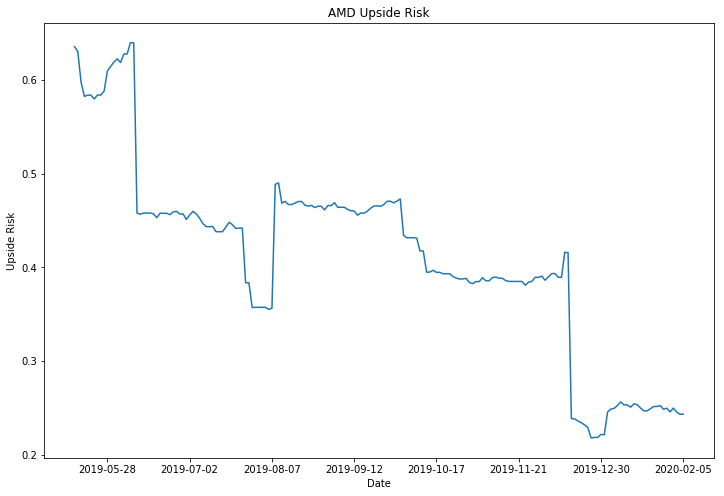

In [6]:
# Compute the running Upside Risk
running = [upside_risk(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Upside Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Upside Risk')
plt.xlabel('Date')
plt.ylabel('Upside Risk')

In [7]:
stock_ur = upside_risk(stocks_returns)
stock_ur

0.4713703918934197

In [8]:
running = [upside_risk(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.6355152817553196,
 0.6301360461848959,
 0.5973837677807354,
 0.5824071230560979,
 0.5837195712237361,
 0.5837195712237361,
 0.5796409510000826,
 0.5838312575902533,
 0.5838312575902533,
 0.5880429546351748,
 0.6096095740570389,
 0.6144744647036944,
 0.6192096877992382,
 0.6224442391333762,
 0.6185295574541951,
 0.6276290508179047,
 0.6277097151489002,
 0.6397349192123726,
 0.6396527223557019,
 0.45783841280217463,
 0.45662543352647805,
 0.4578659042320837,
 0.4578659042320837,
 0.4578659042320837,
 0.45702453591216824,
 0.4529473785725103,
 0.4575956883710694,
 0.4575956883710694,
 0.4575956883710694,
 0.4561010970999125,
 0.45909553216724563,
 0.4596802510871366,
 0.4568748853487679,
 0.4568748853487679,
 0.45094255914920345,
 0.45571930645546704,
 0.459677181060695,
 0.4570037059800351,
 0.4524304978035392,
 0.44667810360553306,
 0.44337062570193764,
 0.4431912523219552,
 0.44358739348382287,
 0.4379120657851883,
 0.4379120657851883,
 0.4379120657851883,
 0.4429817259913845,
 0.44